In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.graph_objects as go
import numpy as np
import tensorflow



In [ ]:

!pip install -q condacolab
import condacolab
condacolab.install()


✨🍰✨ Everything looks OK!


In [ ]:
!conda create --name my_env python=3.10 numpy=1.22.0 ta-lib
!conda activate my_env
!conda install -c conda-forge ta-lib



Solving environment: / failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local/envs/my_env

  added / updated specs:
    - numpy=1.22.0
    - python=3.10
    - ta-lib


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu 
  bzip2              conda-forge/linux-64::bzip2-1.0.8-h7f98852_4 
  ca-certificates    conda-forge/linux-64::ca-certificates-2022.12.7-ha878542_0 
  ld_impl_linux-64   conda-forge/linux-64::ld_impl_

In [ ]:
!conda activate my_env



CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [ ]:
import talib

In [ ]:
start = '2018-08-01'
end =  '2022-08-01'

In [ ]:

sym='RELIANCE.NS'


In [ ]:
fin = yf.download(sym,start,end)
fin_15min = fin.resample('15T').ffill()


[*********************100%***********************]  1 of 1 completed


In [ ]:
fin_15min.tail

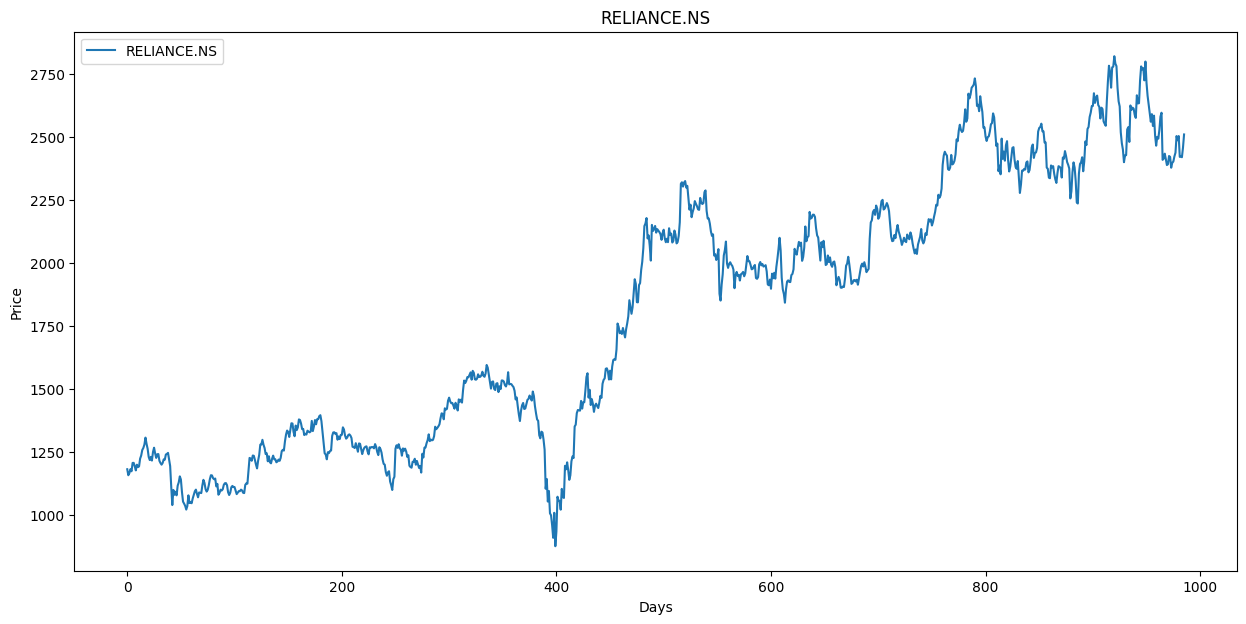

In [ ]:
series = fin['Close']
series1 = fin['Open']
series2= fin['High']
series3 = fin['Low']

series.index = np.arange(series.shape[0])

plt.figure(figsize=(15, 7))
plt.title(sym)

plt.xlabel('Days')
plt.ylabel('Price')

plt.plot(series, label=sym)

plt.legend()
plt.show()

In [ ]:
upper, middle, lower = talib.BBANDS(series, matype=talib.MA_Type.T3)
fin_15min['BB_upper'] = upper
fin_15min['BB_middle'] = middle
fin_15min['BB_lower'] = lower

In [ ]:
closing_prices=pd.DataFrame()
closing_prices['Close']=fin_15min['Close']
closing_prices



,Close
Date,
2018-08-01 00:00:00,1181.153809
2018-08-01 00:15:00,1181.153809
2018-08-01 00:30:00,1181.153809
2018-08-01 00:45:00,1181.153809
2018-08-01 01:00:00,1181.153809
...,...
2022-07-28 23:00:00,2457.100098
2022-07-28 23:15:00,2457.100098
2022-07-28 23:30:00,2457.100098


In [ ]:
closing_prices['EMA13'] = pd.Series.ewm(closing_prices['Close'], span = 13).mean()
closing_prices

In [ ]:
closing_prices['EMA50'] = pd.Series.ewm(closing_prices['Close'], span = 50).mean()
closing_prices

,Close,EMA13,EMA50
Date,,,
2018-08-01 00:00:00,1181.153809,1181.153809,1181.153809
2018-08-01 00:15:00,1181.153809,1181.153809,1181.153809
2018-08-01 00:30:00,1181.153809,1181.153809,1181.153809
2018-08-01 00:45:00,1181.153809,1181.153809,1181.153809
2018-08-01 01:00:00,1181.153809,1181.153809,1181.153809
...,...,...,...
2022-07-28 23:00:00,2457.100098,2457.100075,2456.183287
2022-07-28 23:15:00,2457.100098,2457.100078,2456.219240
2022-07-28 23:30:00,2457.100098,2457.100081,2456.253783


In [ ]:
worth=100000
stocks=0

In [ ]:
fin = fin.reset_index()

fig = go.Figure(data=[go.Candlestick(x=fin['Date'],
                open=fin['Open'],
                high=fin['High'],
                low=fin['Low'],
                close=fin['Close'])])

fig.show()

In [ ]:
print(fin.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
# reliance_final = closing_prices[closing_prices['EMA50'].notnull()]
# reliance_final = reliance_final.reset_index()
# reliance_final = reliance_final.filter(['Close', 'EMA13', 'EMA50', 'Cash', 'Shares','comparison_result'])
# reliance_final ['Cash']=0
# reliance_final ['Shares']=0
# reliance_final.iloc[0,4] = 100000
# # print(reliance_final.head())

# worth=100000

# def compare_elements(row):
#     return row['EMA13'] > row['EMA50']

# df= pd.DataFrame({closing_prices['EMA13'], closing_prices['EMA50']})
reliance_final = closing_prices[closing_prices['EMA50'].notnull()]
reliance_final = reliance_final.reset_index()
reliance_final = reliance_final.filter(['Close', 'EMA13', 'EMA50', 'comparison_result','Cash', 'Shares'])
reliance_final ['Cash']=0
reliance_final ['Shares']=0
reliance_final.iloc[0, 4] = 100000
# reliance_final.iloc[0, 6] = 100000

# print(reliance_final.head())

worth=100000

def compare_elements(row):
    return row['EMA13'] > row['EMA50']

# df= pd.DataFrame({closing_prices['EMA13'], closing_prices['EMA50']})
reliance_final['comparison_result'] = reliance_final.apply(compare_elements, axis=1)

# print(reliance_final['compare_elements'])
# closing_prices['comparison_result'] = closing_prices.apply(compare_elements, axis=1)
# pd.set_option('display.max_rows', None)
# print(closing_prices.head(500))

tookTrade = False

j=0
k=0
index=0

for index in range(len(reliance_final)):
  worth=reliance_final.iloc[index,4]
  stocks=reliance_final.iloc[index,5]
  comp=reliance_final.iloc[index,3]
  cash = worth
  shares=stocks
  close=reliance_final.iloc[index,0]

  if(comp==True and tookTrade==False):
    tookTrade =True
    shares = (cash/close)
    #  print(fin_15min['Close'])
    cash = 0
    j=j+1
    
  if(comp==False and tookTrade == True):
    tookTrade = False
    cash = shares*(close)
    shares=0
    k=k+1

  reliance_final.iloc[index, 4] = cash
  reliance_final.iloc[index, 5] =shares
  # reliance_final.iloc[index, 6] =shares*close+cash
    
  try:
    reliance_final.iloc[index + 1, 4] = reliance_final.iloc[index, 4]
    reliance_final.iloc[index + 1, 5] = reliance_final.iloc[index, 5]
  except:
    pass

reliance_final.iloc[index,4]= shares*close
# for i in closing_prices['comparison_result'].items():
#   # print(i[1])
#   worth=reliance_final.iloc[i[0],3]
#   stocks=reliance_final.iloc[i[0],4]
#   if(i[1]==True and tookTrade==False):
     
#     #  print(worth)
#      tookTrade =True
#      stocks = stocks + (worth/fin_15min['Close'])
#     #  print(fin_15min['Close'])
#      worth = worth-stocks*(fin_15min['Close'])
#      j=j+1

#   if(i[1]==False and tookTrade == True):
#     tookTrade = False
#     worth = worth + stocks*(fin_15min['Close'])
#     stocks=0
#     k=k+1

# for i in closing_prices['EMA13'].count():
  
#             # compare the values in row1 and row2
#         if i>:
#                 stocks = stocks + (worth/fin_15min['Close'])
#                 worth = worth-stocks*(fin_15min['Close'])
#             # else:
#             #     print(f"Values in row {i} and row {j} are not equal.")
  
print(reliance_final.head(3000))

# closing_prices['comparison_result'] = closing_prices.apply(compare_elements, axis=1)
# pd.set_option('display.max_rows', None)
# print(closing_prices.head(500))



            Close        EMA13        EMA50  comparison_result           Cash  \
0     1181.153809  1181.153809  1181.153809              False  100000.000000   
1     1181.153809  1181.153809  1181.153809              False  100000.000000   
2     1181.153809  1181.153809  1181.153809              False  100000.000000   
3     1181.153809  1181.153809  1181.153809              False  100000.000000   
4     1181.153809  1181.153809  1181.153809              False  100000.000000   
5     1181.153809  1181.153809  1181.153809              False  100000.000000   
6     1181.153809  1181.153809  1181.153809              False  100000.000000   
7     1181.153809  1181.153809  1181.153809              False  100000.000000   
8     1181.153809  1181.153809  1181.153809              False  100000.000000   
9     1181.153809  1181.153809  1181.153809              False  100000.000000   
10    1181.153809  1181.153809  1181.153809              False  100000.000000   
11    1181.153809  1181.1538

In [ ]:
print(stocks)
print(reliance_final.tail())
print(k)
print(j)

63.30720871731968
              Close        EMA13        EMA50  comparison_result  \
139964  2457.100098  2457.100075  2456.183287               True   
139965  2457.100098  2457.100078  2456.219240               True   
139966  2457.100098  2457.100081  2456.253783               True   
139967  2457.100098  2457.100083  2456.286972               True   
139968  2509.449951  2464.578636  2458.371795               True   

                 Cash     Shares  
139964       0.000000  63.307209  
139965       0.000000  63.307209  
139966       0.000000  63.307209  
139967       0.000000  63.307209  
139968  158866.271825  63.307209  
238
239
